In [7]:
!sudo /bin/bash -c "(source /venv/bin/activate; pip install --quiet pymc-bart)"

import pymc_bart as pmb
print(pmb.__version__)

0.9.0


In [2]:
%load_ext autoreload
%autoreload 2

import logging

import arviz as az
import pandas as pd
import xarray as xr
import pymc as pm
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import preliz as pz

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [13]:
dir_name = "/app/code/book.2018.Martin.Bayesian_Analysis_with_Python.2e"
#!ls $dir_name/data2
data = pd.read_csv(dir_name + '/data2/penguins.csv')
data.head()

anscombe.csv	     chemical_shifts_theo_exp.csv  islands.csv
anscombe_3.csv	     coal.csv			   penguins.csv
babies.csv	     dummy.csv			   pigs.csv
bikes.csv	     fish.csv			   redwood.csv
bikes_full.csv	     football_players.csv	   space_flu.csv
body_fat.csv	     horseshoe_crab.csv		   tips.csv
body_fat_full.csv    howell.csv
chemical_shifts.csv  iris.csv


,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.75,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.80,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.25,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.45,female,2007


In [20]:
data_tmp = data[["flipper_length", "bill_depth", "bill_length", "body_mass"]].dropna()
X = data_tmp[["flipper_length", "bill_depth", "bill_length"]]
Y = data_tmp["body_mass"]

In [21]:
Y

0      3.750
1      3.800
2      3.250
4      3.450
5      3.650
       ...  
339    4.000
340    3.400
341    3.775
342    4.100
343    3.775
Name: body_mass, Length: 342, dtype: float64

In [22]:
# Create a probabilistic model context.
with pm.Model() as model_pen:
    # Define a HalfNormal prior for the observation noise standard deviation.
    sigma = pm.HalfNormal("sigma", 1)
    # Use Bayesian Additive Regression Trees (BART) to model the mean function mu from predictors X and response Y.
    mu = pmb.BART("mu", X, Y)
    # Define a Normal likelihood with mean mu and standard deviation mu, conditioned on observed data Y.
    y = pm.Normal("y", mu=mu, sigma=mu, observed=Y)
    # Sample from the posterior distribution using default settings.
    idata_pen = pm.sample()
    # Generate posterior predictive samples and add them to the inference data.
    pm.sample_posterior_predictive(idata_pen, extend_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [sigma]
>PGBART: [mu]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
There were 64 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [y]


Output()

<Axes: xlabel='y'>

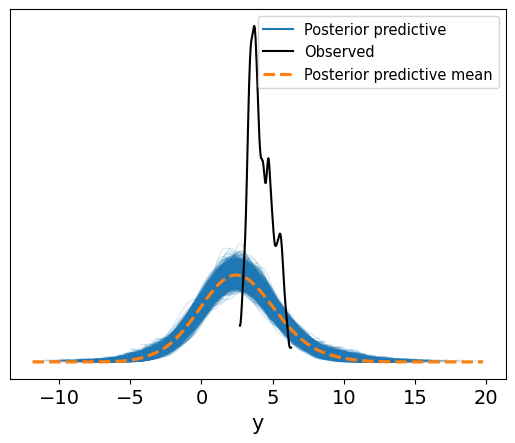

In [23]:
az.plot_ppc(idata_pen)

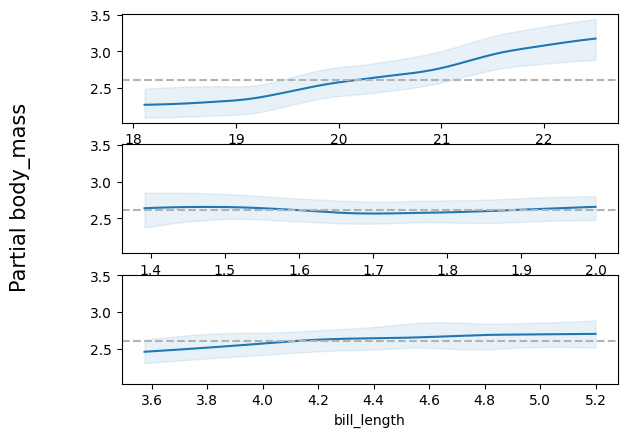

In [25]:
pmb.plot_pdp(mu, X, Y);

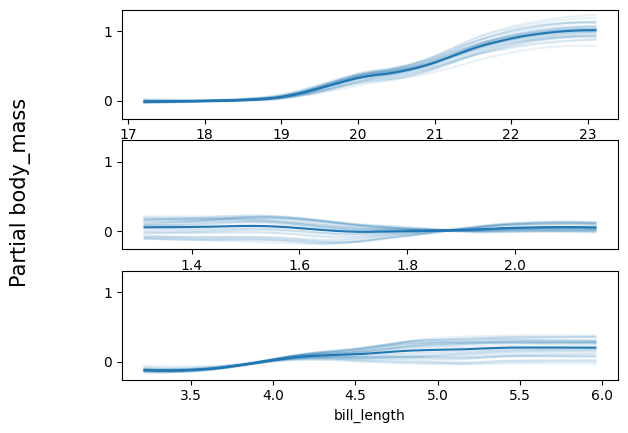

In [27]:
pmb.plot_ice(mu, X, Y);

In [28]:
pmb.plot_variable_importance(idata_pen, mu, X);

AxisError: axis -1 is out of bounds for array of dimension 0